# Logistic Regression

## Motivation: Prediction whether a person getting Diabetes
* For classification we should only accept output y = 0 (no diabetes) and y = 1 (diabetes).
* Linear Regression is not suitable for this kind of task, because LinearRegression generates continues output.
* We want output: $0 <= \sigma(x) <= 1$ (where $\sigma$ is our model).

## The Sigmoid function

$$ 
\Large \text{$sigmoid(z)= \frac{1}{1+e^{-z}}$}
$$


## Logistic Regression Model

Standard Linear Regression model: $h_{w}(x)=w^{T}x$

A subtile change introduces non-linearity:

$$ 
\Large \text{$\sigma_{w}(x)= \frac{1}{1+e^{-h_{w}(x)}} = \frac{1}{1+e^{-w^{T}x}}$}
$$

## Interpretation of Model Output

$$ 
\Large \text{$\sigma_{w}(x) \approx$ estimated probability, that $y = 1$}
$$

More formally, we work with a __hypothesis__:

$$ 
\Large \text{$\sigma_{w}(x) = P(y = 1 | x; w )$}
$$


The Probability that $y = 1$, that the input is $x$ and the model is parameeteriized by $w$.

The actual labels are still discrete ($y=0$ or $y=1$), but the probabilities need to add to one:

$$ 
\Large \text{$P(y = 0 | x; w ) + P(y = 1 | x ; w) = 1$}
$$

## Loss Function of Logistic Regression

Proposed loss function (specifically adapted to logistic regression):

$$ 
\Large \text{$J(\sigma_{w}(x_{i}), y_{i}) = y_{i}log(\sigma_{w}(x_{i}))-(1-y_{i})log(1-\sigma_{w}(x_{i}))$}
$$

* J is konvex, but there is no analytical solution

## Loss to minimize

$$ 
\Large \text{$argmin_{w}J(w) = argmin_{w} \sum_{i=1}^{N} y_{i}log(\sigma_{w}(x_{i}))-(1-y_{i})log(1-\sigma_{w}(x_{i}))$}
$$

## Gradient for Logistic Regression
$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}} \left[ \sum_{i=1}^{N} -y_i \log(\sigma_{\mathbf{w}}(\mathbf{x}_i)) - (1 - y_i) \log(1 - \sigma_{\mathbf{w}}(\mathbf{x}_i)) \right]
$$

Expanding this gradient, we get:

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \sum_{i=1}^{N} - (y_i - \sigma_{\mathbf{w}}(\mathbf{x}_i)) \mathbf{x}_i
$$

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

## Data Preprocessing

### Data Exploration

In [3]:
# Loading example data (note: we dont care much about data cleaning here, just about how LR works)
df = pd.read_csv('diabetes.csv')
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Rename columns
columns = ['Pregnancies', 'Glucose', 'Blood pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes pedigree function', 'Age', 'Diabetes']
df.columns = columns 

In [5]:
df.head()

,Pregnancies,Glucose,Blood pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,Blood pressure,Skin Thickness,Insulin,BMI,Diabetes pedigree function,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Diabetes                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling Outliers

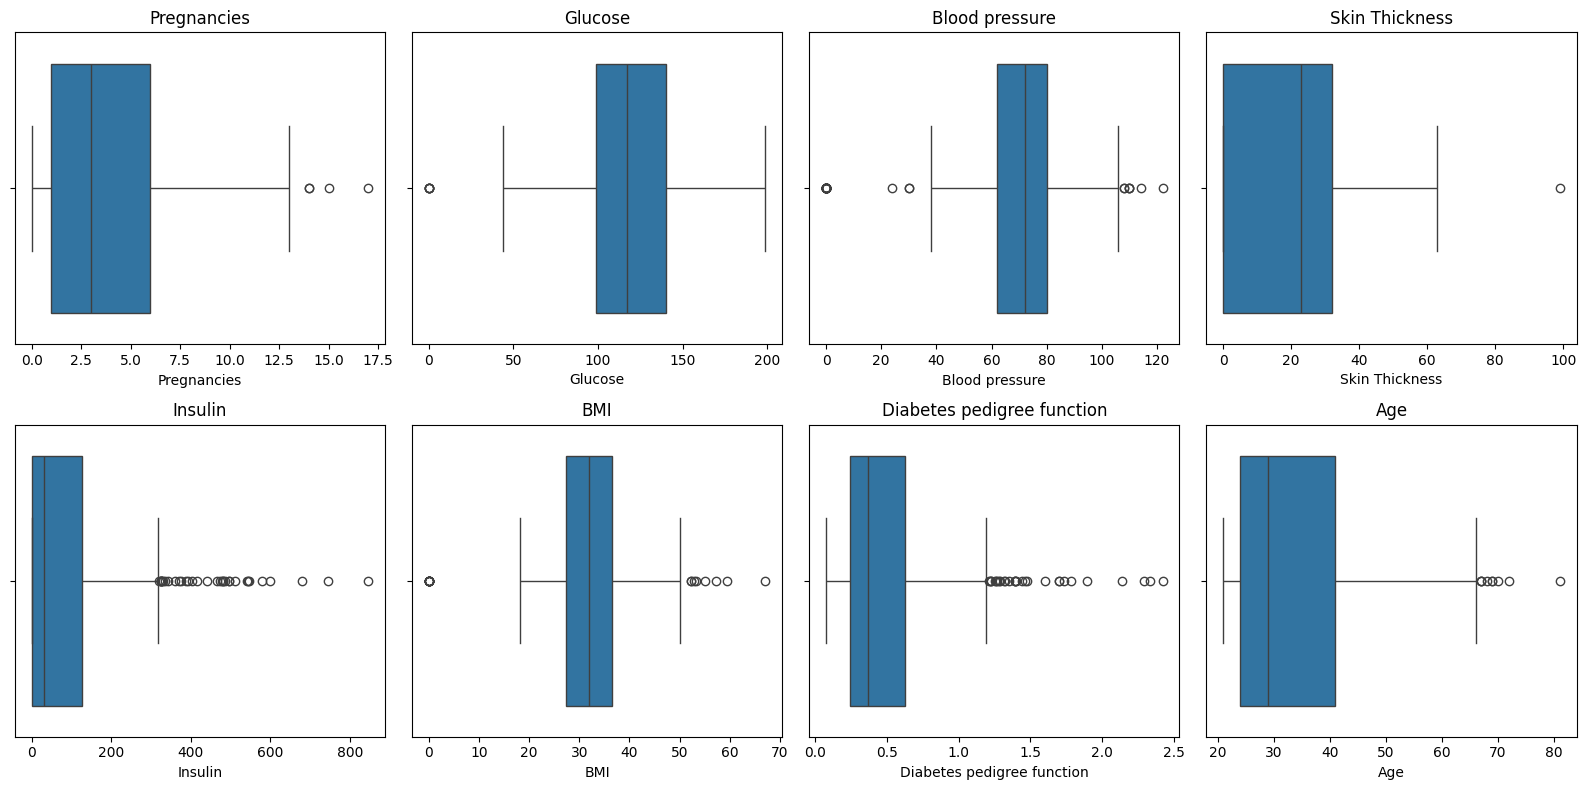

In [8]:
X = df.iloc[:,:-1]

# 2 Rows, 4 Columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten axes array
axes = axes.flatten()

# Plot a boxplot for each feature
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axes[i])
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

In [9]:
# Calculating Q1 (25% percentile) and Q3 (75% percentile) for earch column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculating Interquartile range (IQS)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Keep only rows where all columns 
df = df[~((df < lower) | (df > upper)).any(axis=1)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 639 non-null    int64  
 1   Glucose                     639 non-null    int64  
 2   Blood pressure              639 non-null    int64  
 3   Skin Thickness              639 non-null    int64  
 4   Insulin                     639 non-null    int64  
 5   BMI                         639 non-null    float64
 6   Diabetes pedigree function  639 non-null    float64
 7   Age                         639 non-null    int64  
 8   Diabetes                    639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


### Standardization
Standardize the features values to have a mean of zero and standard deviation of 1. This ensures that all features contribute equally to the model.

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
# mean = 0, standard deviation = 1
scaler = StandardScaler(with_mean=False, with_std=False)
scaler.fit(X)
X = scaler.fit_transform(X)

## Start with Machine Learning

In [13]:
# Shape of the data
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (639, 8)
Shape of y: (639,)


In [14]:
# Split for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (511, 8)
Shape of y_train: (511,)
Shape of X_test: (128, 8)
Shape of y_test: (128,)


In [15]:
class LogisticRegression:
    def __init__(self, n_features: int) -> None:
        self.w = np.random.rand(n_features+1)

    def add_bias(self, X: np.array) -> np.array:
        bias_column = np.ones((X.shape[0], 1))
        return np.hstack((bias_column, X))

    def sigmoid(self, z: np.array) -> np.array:
        z = np.clip(z, -500, 500)  # Clip values to avoid overflow
        return 1.0 / (1.0 + np.exp(-z))
    
    def step(self, X: np.array) -> np.array:
        return np.array([1 if x >= 0.5 else 0 for x in X])

    def train(self, X: np.array, y: np.array, learning_rate: float, max_iter: int, verbose=False) -> None:
        X_b = self.add_bias(X)
        for iter in range(max_iter):
            h_w = np.dot(X_b, self.w)                           # (N x n_in+1) * (n_in+1,) = (N,)
            sigma_w = self.sigmoid(h_w)                         # (N,)
            
            J_w = -np.dot((y - sigma_w), X_b) / len(X_b)        # (N,) * (N x n_in+1) = (n_in+1,)
            self.w = self.w - learning_rate * J_w               # (N,)

            if verbose and iter % 1000 == 0:
                epsilon = 1e-15 
                sigma_w = np.clip(sigma_w, epsilon, 1 - epsilon)
                loss = -np.mean(y * np.log(sigma_w) + (1 - y) * np.log(1 - sigma_w))
                print(f'Iteration: {iter}, Loss: {loss}')

    def predict(self, x: np.array) -> np.array:
        x_b = self.add_bias(x)
        z = np.dot(x_b, self.w)
        sigma_w = self.sigmoid(z)
        return self.step(sigma_w)

In [16]:
# Create a model
model = LogisticRegression(n_features=8)

# Start training the logistic regresssion model
model.train(X_train, y_train, learning_rate=2e-4, max_iter=10000, verbose=True)

Iteration: 0, Loss: 24.062796581748238
Iteration: 1000, Loss: 0.8298913913619897
Iteration: 2000, Loss: 0.7128552620494948
Iteration: 3000, Loss: 0.6692805764099605
Iteration: 4000, Loss: 0.6384676006390062
Iteration: 5000, Loss: 0.6147470802795227
Iteration: 6000, Loss: 0.5967980002712869
Iteration: 7000, Loss: 0.583710102735675
Iteration: 8000, Loss: 0.5745285184763181
Iteration: 9000, Loss: 0.568298610892053


In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.734375
